In [30]:
import numpy as np
import matplotlib.pyplot as plt


In [31]:
# 定义常数
hbar = 1

# 定义 H(x)
def H(x):
    return np.where((0 <= x) & (x <= np.pi), x / 2, np.pi - x / 2)

# 定义函数 a, b, c, d
def a(x, y):
    return np.cos(H(x)) * np.cos(np.cos(y) * (2 - np.cos(x)) / hbar)

def b(x, y):
    return np.cos(H(x)) * np.sin(np.cos(y) * (2 - np.cos(x)) / hbar)

def c(x, y):
    return np.sin(H(x)) * np.cos(np.cos(y) * (2 + np.cos(x)) / hbar)

def d(x, y):
    return -np.sin(H(x)) * np.sin(np.cos(y) * (2 + np.cos(x)) / hbar)

# 计算梯度
def gradient(f, x, y, eps=1e-5):
    f_x = (f(x + eps, y) - f(x - eps, y)) / (2 * eps)
    f_y = (f(x, y + eps) - f(x, y - eps)) / (2 * eps)
    return f_x, f_y

# 计算速度场
def compute_velocity_field_np(x, y, dx, dy):
    # 使用内置的np 求解梯度
    a_val = a(x, y)
    b_val = b(x, y)
    c_val = c(x, y)
    d_val = d(x, y)

    a_grad_x, a_grad_y = np.gradient(a_val, dx, dy)
    b_grad_x, b_grad_y = np.gradient(b_val, dx, dy)
    c_grad_x, c_grad_y = np.gradient(c_val, dx, dy)
    d_grad_x, d_grad_y = np.gradient(d_val, dx, dy)

    u_x = hbar * (a_val * b_grad_x - b_val * a_grad_x + c_val * d_grad_x - d_val * c_grad_x)
    u_y = hbar * (a_val * b_grad_y - b_val * a_grad_y + c_val * d_grad_y - d_val * c_grad_y)

    return u_x, u_y

def compute_velocity_field_FD(x, y):
    # 有限差分进行计算
    a_val = a(x, y)
    b_val = b(x, y)
    c_val = c(x, y)
    d_val = d(x, y)

    a_grad_x, a_grad_y = gradient(a, x, y)
    b_grad_x, b_grad_y = gradient(b, x, y)
    c_grad_x, c_grad_y = gradient(c, x, y)
    d_grad_x, d_grad_y = gradient(d, x, y)

    u_x = hbar * (a_val * b_grad_x - b_val * a_grad_x + c_val * d_grad_x - d_val * c_grad_x)
    u_y = hbar * (a_val * b_grad_y - b_val * a_grad_y + c_val * d_grad_y - d_val * c_grad_y)

    return u_x, u_y

In [32]:
size = 128
x = np.linspace(0, 2 * np.pi, size)
y = np.linspace(0, 2 * np.pi, size)
X, Y = np.meshgrid(x, y)

In [33]:
# 计算函数值
A = a(X, Y)
B = b(X, Y)
C = c(X, Y)
D = d(X, Y)


In [34]:
# 计算步长
dx = x[1] - x[0]
dy = y[1] - y[0]

In [35]:
U_x, U_y = compute_velocity_field_np(X, Y, dx, dy)

U_x_FD, U_y_FD = compute_velocity_field_FD(X, Y)

# 计算速度场的大小
U_magnitude = np.sqrt(U_x**2 + U_y**2)

U_magnitude_FD = np.sqrt(U_x_FD**2 + U_y_FD**2)

(0.0, 6.283185307179586, 0.0, 6.283185307179586)

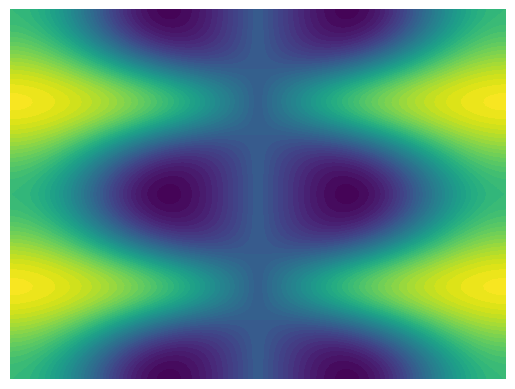

In [38]:

plt.contourf(X, Y, A, levels=50, cmap='viridis')
plt.axis('off')

(0.0, 6.283185307179586, 0.0, 6.283185307179586)

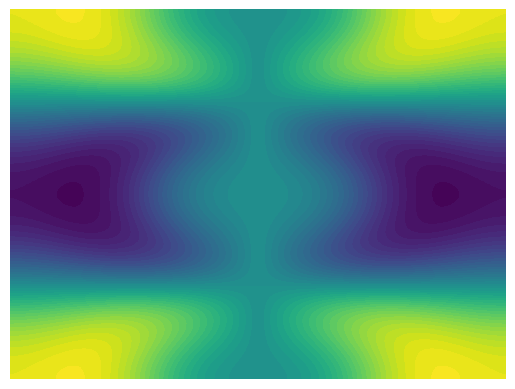

In [39]:
plt.contourf(X, Y, B, levels=50, cmap='viridis')
plt.axis('off')

(0.0, 6.283185307179586, 0.0, 6.283185307179586)

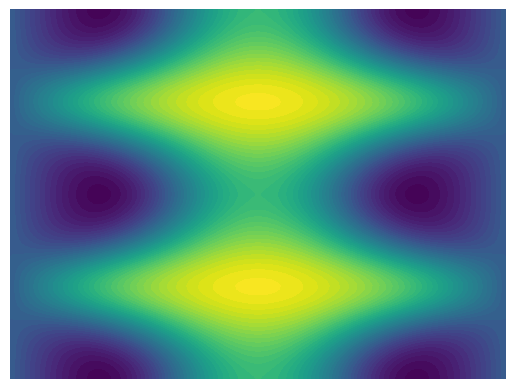

In [40]:
plt.contourf(X, Y, C, levels=50, cmap='viridis')
plt.axis('off')

(0.0, 6.283185307179586, 0.0, 6.283185307179586)

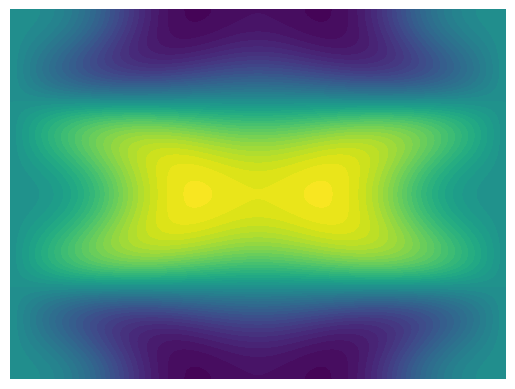

In [41]:
plt.contourf(X, Y, D, levels=50, cmap='viridis')
plt.axis('off')

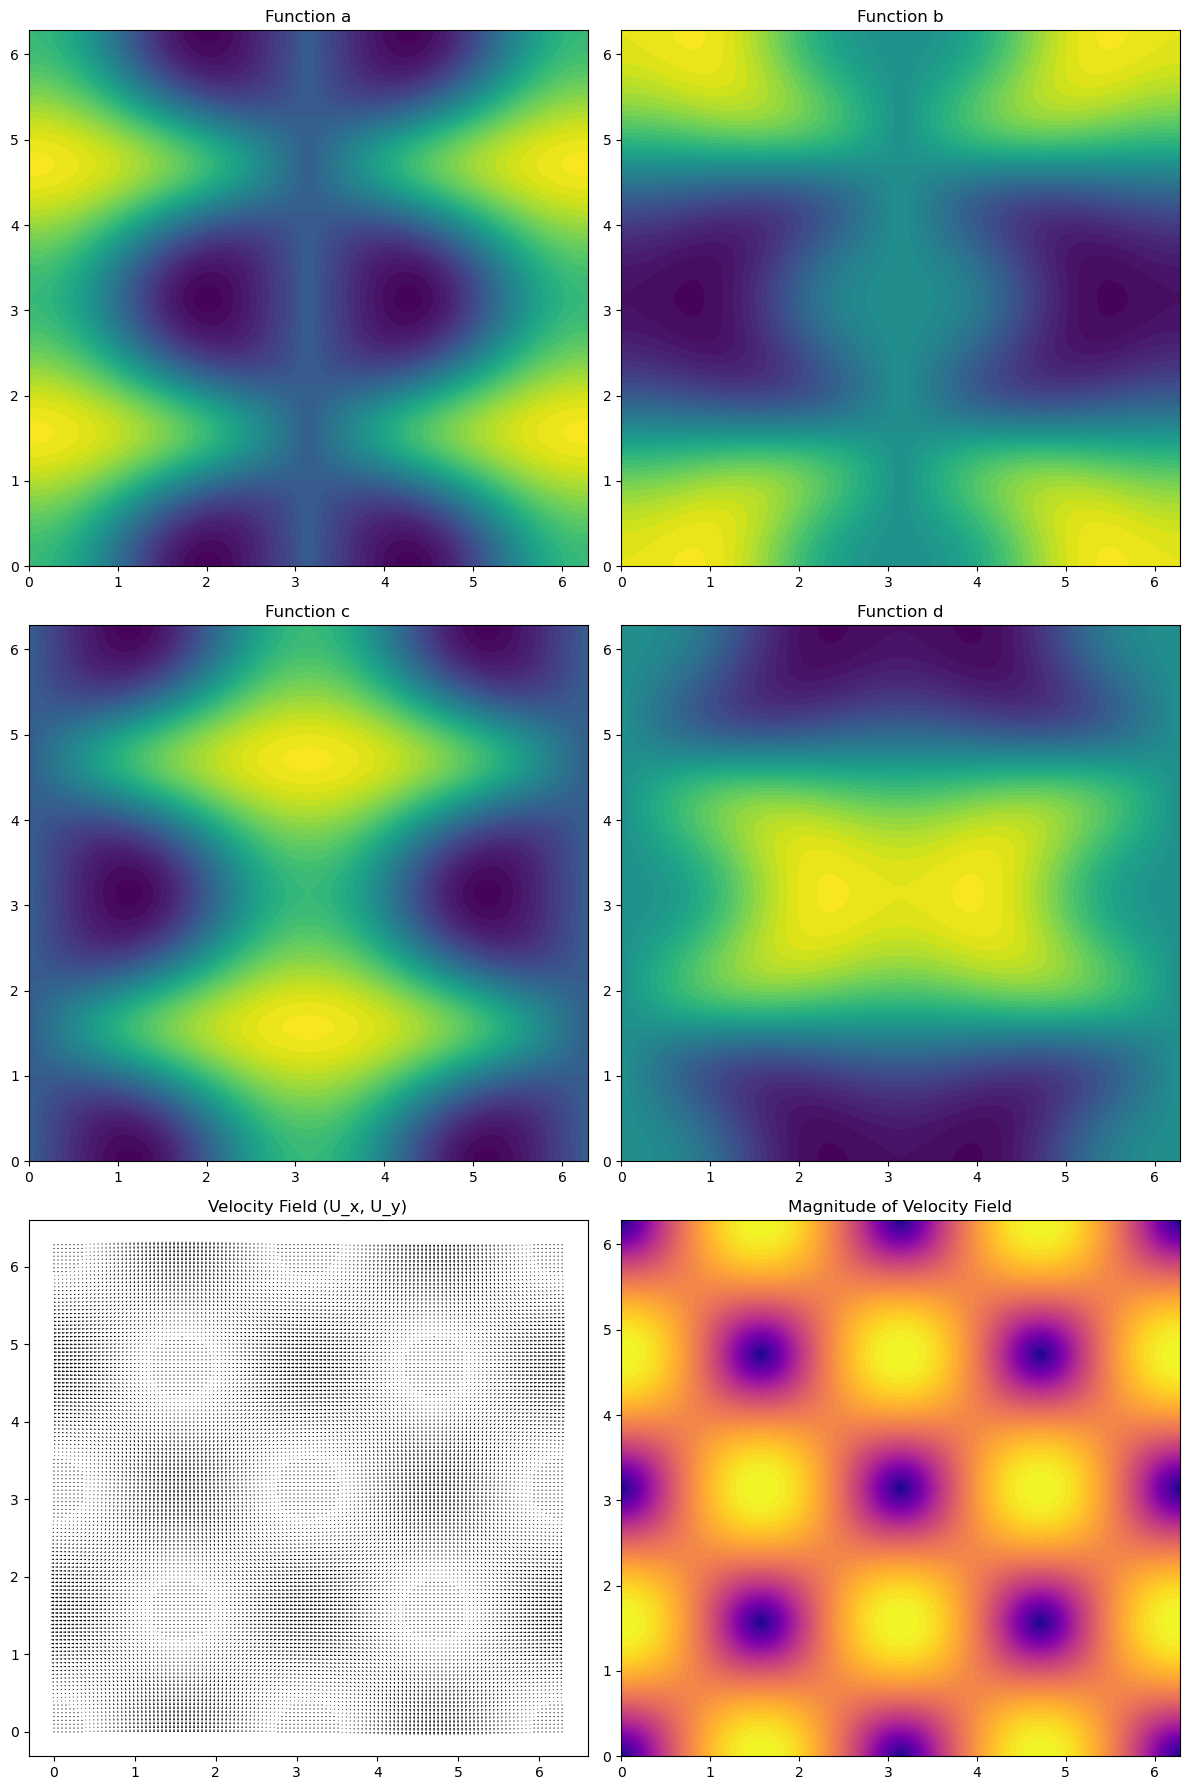

In [36]:
# 可视化
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# 可视化 a, b, c, d
axs[0, 0].contourf(X, Y, A, levels=50, cmap='viridis')
axs[0, 0].set_title('Function a')
axs[0, 1].contourf(X, Y, B, levels=50, cmap='viridis')
axs[0, 1].set_title('Function b')
axs[1, 0].contourf(X, Y, C, levels=50, cmap='viridis')
axs[1, 0].set_title('Function c')
axs[1, 1].contourf(X, Y, D, levels=50, cmap='viridis')
axs[1, 1].set_title('Function d')

# 可视化速度场
axs[2, 0].quiver(X, Y, U_x, U_y)
axs[2, 0].set_title('Velocity Field (U_x, U_y)')
axs[2, 1].contourf(X, Y, U_magnitude, levels=50, cmap='plasma')
axs[2, 1].set_title('Magnitude of Velocity Field')

plt.tight_layout()
plt.show()

## 可视化速度场